<a href="https://colab.research.google.com/github/aldodec/Neural_Networks/blob/master/Boston_Housing_Price_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.datasets import boston_housing

In [0]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [0]:
train_data.shape

(404, 13)

In [0]:
test_data.shape

(102, 13)

In [0]:
## preparing the data: we stadarize the train data

In [0]:
mean = train_data.mean(axis=0)
std = train_data.std(axis = 0)

In [0]:
train_data = (train_data-mean)/std
test_data = (test_data-mean)/std

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
## We build the model into an object

In [0]:
def build_model():
  model = Sequential()

  model.add(Dense(64,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(1))

  model.compile(optimizer = 'rmsprop',loss='mse',metrics = ['mae'])
  return model

In [0]:
### We use k-fold validation

In [0]:
k = 4
num_val_samples = len(train_data)//4
num_epochs = 100
all_scores = []

for i in range(k):
  print('Processing fold number',i)
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]

  partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                       train_data[(i+1)*num_val_samples:]],
                                      axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                       train_targets[(i+1)*num_val_samples:]],
                                      axis=0)
  model = build_model()
  model.fit(partial_train_data,partial_train_targets,
            epochs=num_epochs,
            batch_size = 1,
            verbose = 0)
  val_mse, val_mae = model.evaluate(val_data,val_targets,verbose=0)
  all_scores.append(val_mae)

Processing fold number 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Processing fold number 1
Processing fold number 2
Processing fold number 3


In [0]:
all_scores

[2.1203585, 2.6625814, 2.5101407, 2.3912838]

In [0]:
np.mean(all_scores)

2.421091

In [0]:
## We'll train for 500 epochs

In [0]:
k = 4
num_val_samples = len(train_data)//4
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print('Processing fold number',i)
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]

  partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                       train_data[(i+1)*num_val_samples:]],
                                      axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                       train_targets[(i+1)*num_val_samples:]],
                                      axis=0)
  model = build_model()
  history = model.fit(partial_train_data,partial_train_targets,
            validation_data = (val_data,val_targets),
            epochs=num_epochs,
            batch_size = 1,
            verbose = 0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)
  print('====='*20)

Processing fold number 0
Processing fold number 1
Processing fold number 2
Processing fold number 3


In [0]:
average_mean_history = []
for i in range(num_epochs):
  average_mean_history.append(np.mean([all_mae_histories[j][i] for j in range(4)]))

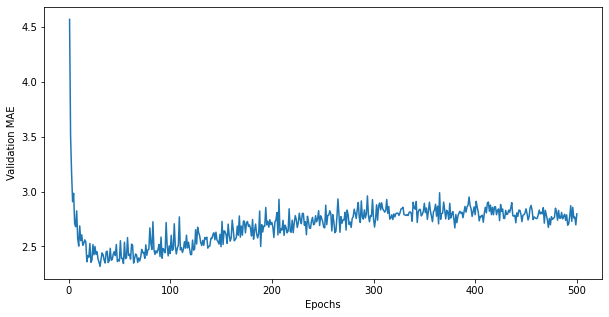

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(range(1,len(average_mean_history)+1),average_mean_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
#plt.legend()
plt.show()

In [0]:
### we smooth the plot by doing an exponential moving average

In [0]:
def smooth_curve(points,factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor + point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [0]:
smooth_mae_history = smooth_curve(average_mean_history[10:])

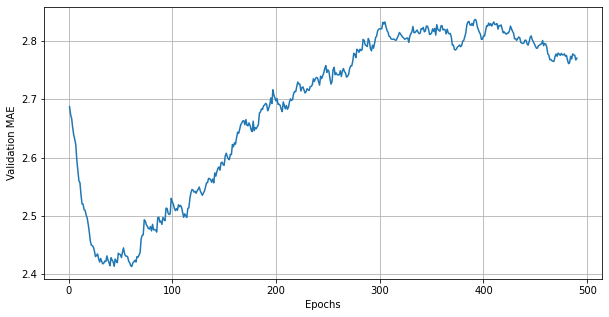

In [0]:
plt.figure(figsize = (10,5))
plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.grid(True)
plt.show()

In [0]:
#### minimum mae around 80 epochs

In [0]:
model = build_model()
model.fit(train_data,train_targets,
          epochs = 80,
          batch_size = 16,
          verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data,test_targets)

102/102 [==============================] - 0s 1ms/sample - loss: 16.0720 - mean_absolute_error: 2.4202


In [0]:
test_mae_score

2.420157